<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/Project_Traffic_Sign_Detection_Using_LeNet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0: PROBLEM STATEMENT

Dataset: The German Traffic Sign Recognition Benchmark(GTSRB)

# STEP 1: IMPORT LIBRARIES AND DATASET

In [ ]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# UPLOAD THE Images 
with open("/content/drive/MyDrive/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/test.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

# STEP 2: IMAGE EXPLORATION

1

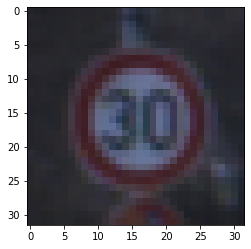

In [ ]:
i=4000
plt.imshow(X_train[i])
y_train[i]

1

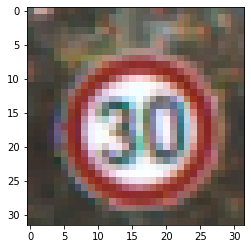

In [ ]:
i = 1001
plt.imshow(X_test[i]) 
y_test[i]

# STEP 3: DATA PEPARATION

In [ ]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [ ]:
# convert images to gray scale 
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [ ]:
# normalize tha data 
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

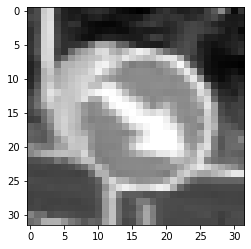

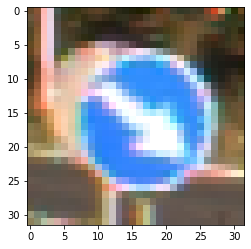

In [ ]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# STEP 4: MODEL TRAINING

In [ ]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [ ]:
image_shape = X_train_gray[i].shape

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 17s 229ms/step - loss: 3.4146 - accuracy: 0.1199 - val_loss: 2.2561 - val_accuracy: 0.3880
Epoch 2/50
70/70 [==============================] - 15s 221ms/step - loss: 1.6972 - accuracy: 0.5338 - val_loss: 1.2545 - val_accuracy: 0.6425
Epoch 3/50
70/70 [==============================] - 16s 224ms/step - loss: 0.8557 - accuracy: 0.7597 - val_loss: 1.0090 - val_accuracy: 0.7429
Epoch 4/50
70/70 [==============================] - 16s 223ms/step - loss: 0.5912 - accuracy: 0.8396 - val_loss: 0.8944 - val_accuracy: 0.7837
Epoch 5/50
70/70 [==============================] - 16s 224ms/step - loss: 0.4637 - accuracy: 0.8770 - val_loss: 0.8380 - val_accuracy: 0.8054
Epoch 6/50
70/70 [==============================] - 16s 223ms/step - loss: 0.3794 - accuracy: 0.9035 - val_loss: 0.8079 - val_accuracy: 0.8213
Epoch 7/50
70/70 [==============================] - 16s 224ms/step - loss: 0.3243 - accuracy: 0.9168 - val_loss: 0.7751 - val_accuracy: 0.8298

# STEP 5: MODEL EVALUATION

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy :' ,score[1])

Test Accuracy : 0.8698337078094482


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

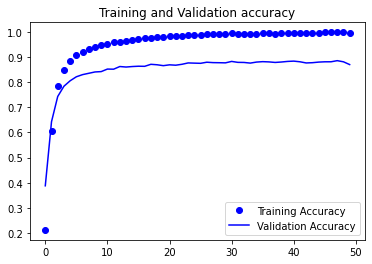

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


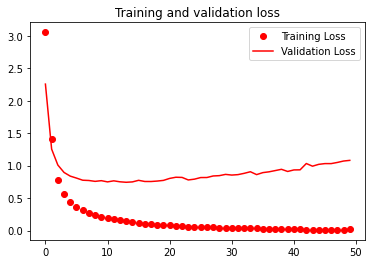

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


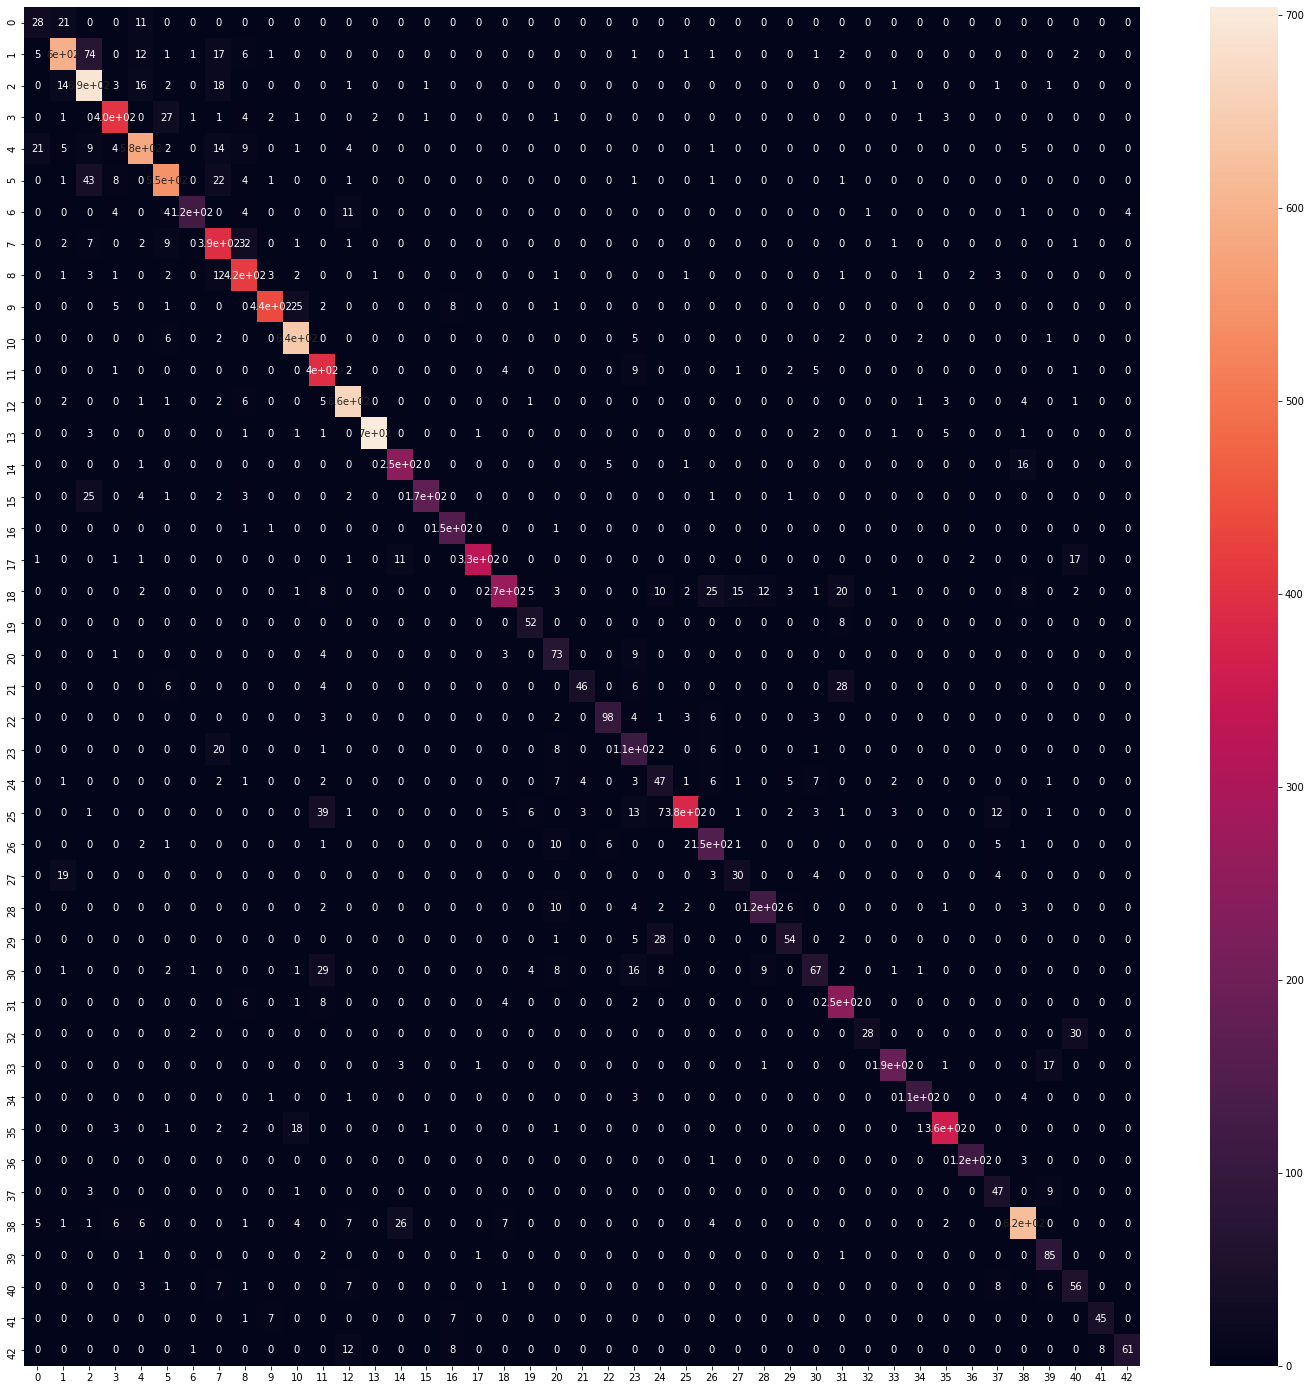

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

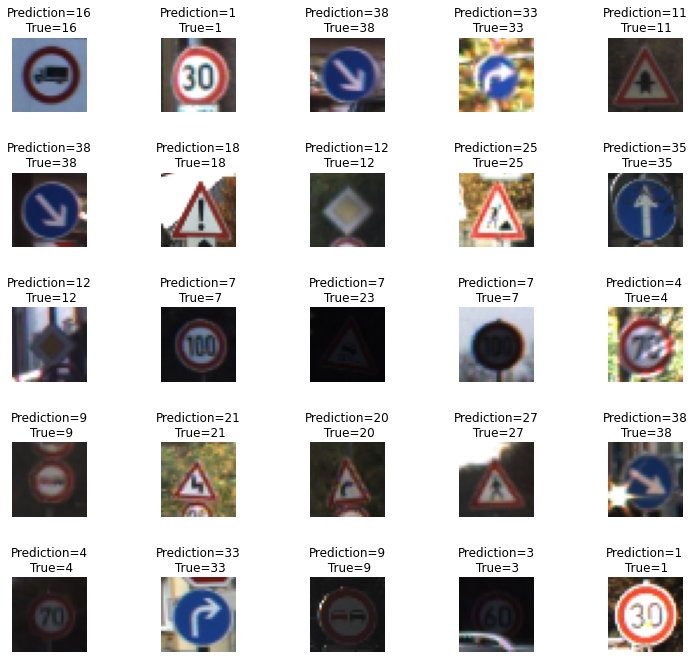

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,predicted_classes)

0.8726840855106889